In [144]:
import pandas as pd
# import pandas.rpy.common as com

import seaborn as sns
sns.set()
sns.set_context('talk')

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# COGS 108 - Final Project


## Overview

The objective of this project was to determine what led to customer satisfaction onboard flights. I used a dataset containing 130K customer reviews of their flight experience, which included some demographic information as well as various details about the type of flight and amenities onboard. I visualized this through Kernel Density Estimation and variable cross correlation, and determined that older passengers who flied business class for business were more likely to be satisfied, and flights with more convenience and amenities (online boarding, ease of online booking, inflight entertainment) were more likely to lead to a satisfied customer. 

## Names
- Richard Li
- Erika Dinh
- Katie Pream
- Sherilyn Kuo

## Research Question

Do people who fly a higher class, and thus pay more, have higher customer satisfaction than people who fly a lower class, in turn paying less? What other attributes lead to increased satisfaction?

## Background & Prior Work

It is known that the more you pay, the more luxurious an experience you get. The same goes for traveling on a plane. The higher class one flies, the better and more comfortable flight experience they have, although with a cost “as much as a 70 percent increase in fares” \[2\]. This is due to the limited number of luxury seats per plane as they tend to take more real estate in the cabin, not to mention the pampering treatment before and during the flight such as “lie-flat seats, high-end food, comfy amenities, \[and\] more attentive service” \[3\]. According to the Forbes article, Economy Plus on United Airlines provides “an extra five inches of legroom” \[1\] allows passengers to easily stow bags and sit more comfortably. By having that extra legroom, passengers may not even need to stow bags or luggages in the overhead compartments which can make a flight a lot more comfortable as they do not need to worry about retrieving their luggage in the beginning or end of the flight.

References:

- 1. https://www.forbes.com/sites/geoffwhitmore/2018/08/17/review-of-united-economy-plus/?sh=56d43d543663
- 2. https://www.afr.com/life-and-luxury/travel/8-reasons-firstclass-airfares-are-so-expensive-20180530-h10q00
- 3. https://www.washingtonpost.com/travel/2019/11/15/airline-fares-are-complicated-heres-how-know-which-one-you-need/

## Datasets

US Airline Passenger Satisfaction
https://www.kaggle.com/johndddddd/customer-satisfaction

This is a dataset with ~130K observations that pertains to customer satisfaction on flights. It contains observations that center around both the demographic of the customer, such as their age and reason for traveling, as well as details about the flight itself, such as what amenities were offered, length / delays of the flight, and flight class.

## Setup

I used:
- `pandas` for dataframe processing
- `seaborn` and `matplotlib` for graphing

## Data Cleaning

Here, I first read in the csv as a local file, and remove all null values.

I then rename one column for better understanding, as well as map other variables from string values to boolean or int values. This is for added ease in the exploratory data analysis portion of this project. 

Originally, I intended to randomly sample a tenth of the entries from the dataset, but found that the deviation in values nullified any potential benefit to efficiency through sampling. 

I also remove the `id` column because it is not needed for any analysis we will conduct later.

In [145]:
# read the csv
df = pd.read_csv("satisfaction.csv")

# drop all null values
df = df.dropna()

# rename a column
df = df.rename(columns = {"satisfaction_v2" : "Satisfaction"})

# map a string-type observation to a boolean (for ease in future data analysis)
satisfaction = {"satisfied" : True, "neutral or dissatisfied" : False}
df["Satisfaction"] = df["Satisfaction"].map(satisfaction)

# map gender to two int values
# i understand that gender is not binary, but all entries in this dataset had either male or female value
gender = {"Female" : 0, "Male" : 1}
df["Gender"] = df["Gender"].map(gender)

# map flight class to int scale (for ease in future data analysis)
flight_class = {"Eco" : 0, "Eco Plus" : 1, "Business" : 2}
df["Class"] = df["Class"].map(flight_class)

# remove id column
df = df.drop(columns=['id'])

In [146]:
# the dataframe we will be using
df1.head()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,True,0,Loyal Customer,65,Personal Travel,0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,True,1,Loyal Customer,47,Personal Travel,2,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,True,0,Loyal Customer,15,Personal Travel,0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,True,0,Loyal Customer,60,Personal Travel,0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,True,0,Loyal Customer,70,Personal Travel,0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## EDA (Analysis and Results)

**Analysis**

I inspect and visualize the distributions of certain variables. These are:
- `Satisfaction`, so that I can see the number of people satisfied and neutral/dissatisfied with their flight
- `Age`, as an overview of the demographic of people flying
    - I also check the KDE to see how ages affect Satisfaction
- `Class`, as an overview of the types of flights
    - I also check the KDE to see how flight class affects Satisfaction
- `Type of Travel`, as an additional overview of traveler demographic
    - I also check the KDE to see how type of travel affects Satisfaction

I then check the correlation that the variables have with each other, through the usage of `.corr()` that is then visualized with a correlation heatmap. I use this to distinguish variables that seemingly have very little impact on satisfaction. While I originally intended to remove variables that logically seemed as if they would have very little impact on customer satisfaction, I opted to omit that section from the cleaning portion for exploratory data analysis to see if any interesting results could be yielded. I visualize this with a heatmap. Surprisingly, keeping these variables led to more understanding of what would influence someone to be satisfied. 

**Results**

From the KDE (Kernel Density Estimate) and the correlation heatmap, I understood much more about the data. 

I can see that in the dataset, there are less satisfied customers than otherwise. From analyzing customer age, it seems as if younger buyers are less likely to be satisfied than older customers. Additionally, business travelers and people who are flying business class are more likely to be satisfied, as opposed to people who are flying economy class and flying casually.

Through the correlation heatmap, I was able to understand specifically which variables would have a greater coefficient and thus relation to customer satisfaction. These are many of the aspects of a flight that can be categorized as convenience and amenities, such as inflight entertainment, ease of online booking, and online boarding. 

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


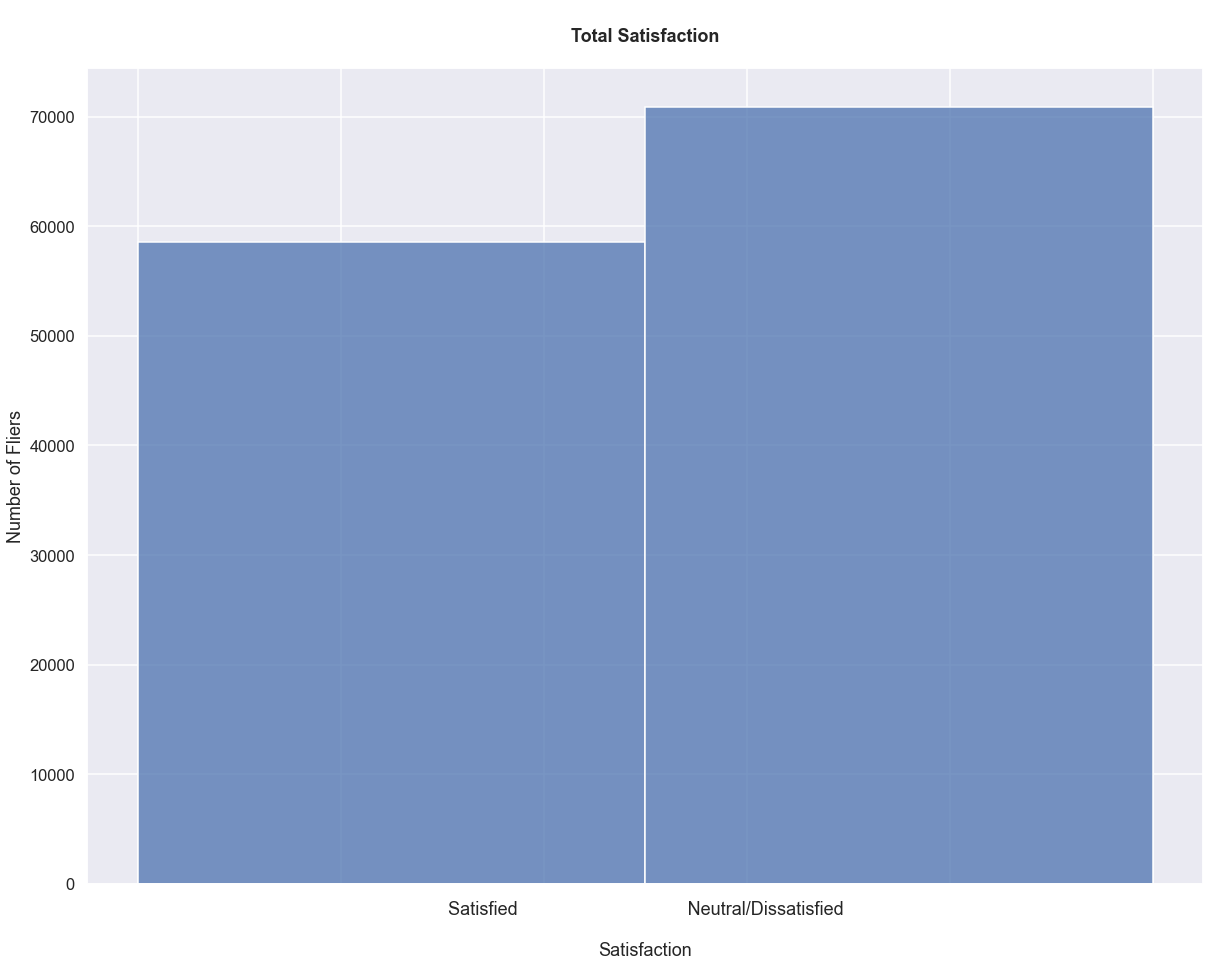

In [147]:
# plot distribution of Satisfaction
# from this, we can see that overall, less people are satisfied than either neutral or dissatisfied

# set size
plt.figure(figsize=(20,15))

# plot
fig = sns.histplot(data = df, x = 'Satisfaction', bins = 2)

# set title, labels
fig.set(xlabel = 'Satisfied                                  Neutral/Dissatisfied\n\nSatisfaction', ylabel = 'Number of Fliers')
fig.set_xticklabels([])
plt.title('\nTotal Satisfaction\n', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '\nAge Histogram\n')

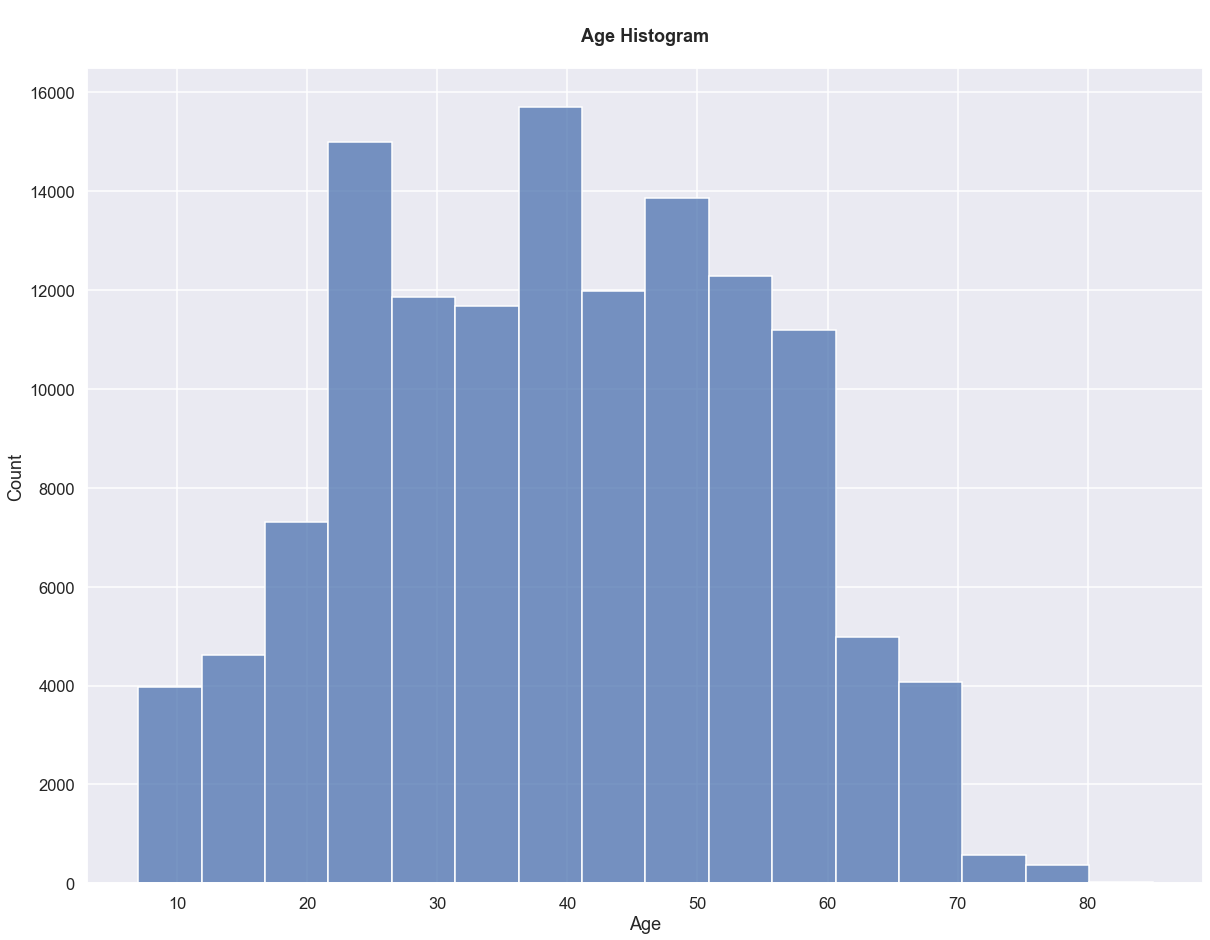

In [148]:
# plot distribution of age
# seemingly near-normal distribution of age, mostly middle-aged riders
# less towards extreme high end of scale

# set size
plt.figure(figsize=(20,15))

# plot
fig = sns.histplot(data = df, x = 'Age', bins = 16)

# title the viz
plt.title('\nAge Histogram\n', fontweight = 'bold')

/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be rem

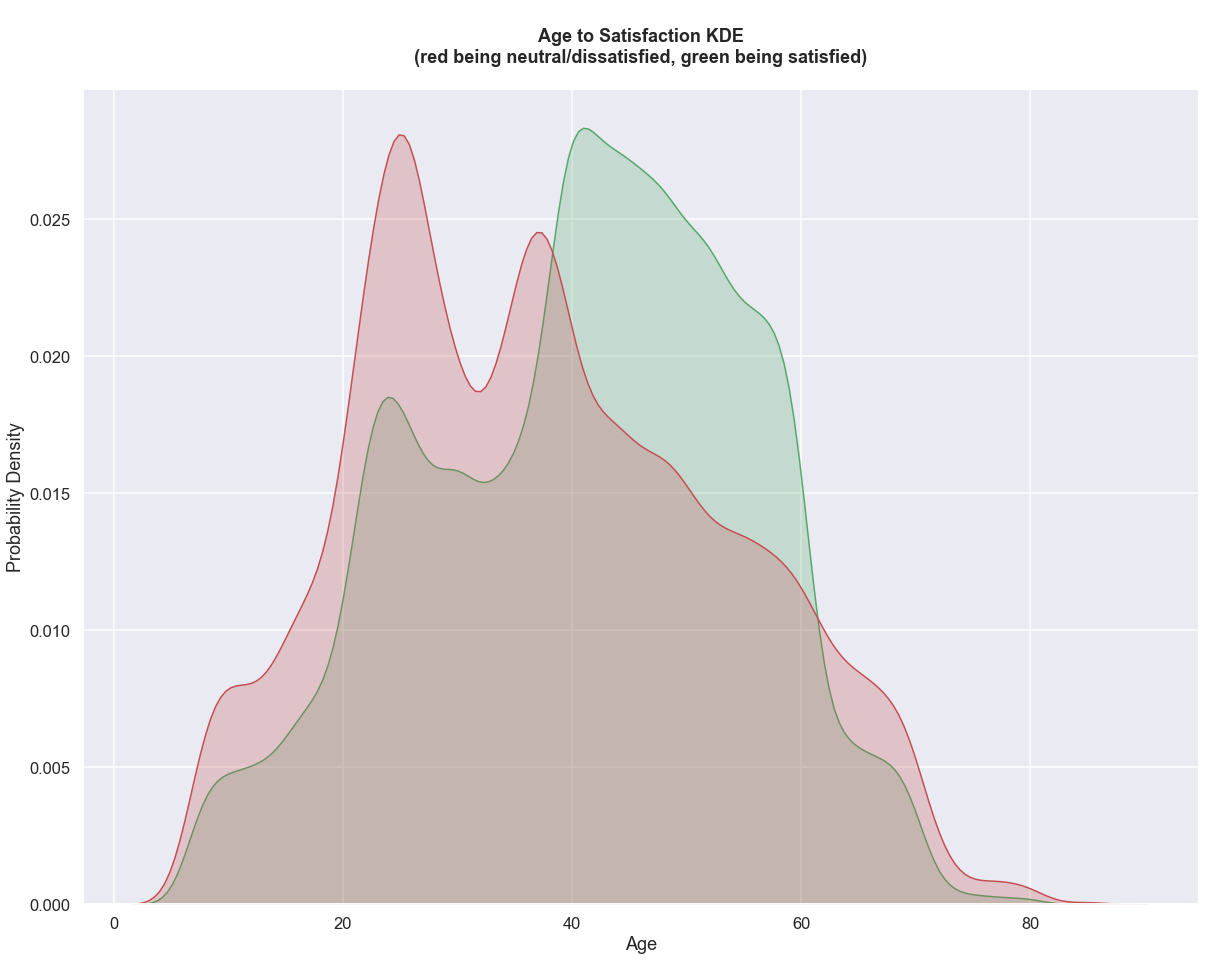

In [149]:
# plot kde of age to satisfaction
# the highest density of dissatisfied customers is lower than that of satisfied customers
# however, this somewhat aligns with the peaks of customer ages shown above in the customer age distribution
# ultimately, it is more probabilistic for an older customer to be more satisfied than a younger customer

# set size
plt.figure(figsize=(20,15))

# plot 
sns.kdeplot(df.loc[(df['Satisfaction'] == True), 'Age'], color = 'g', shade = True, Label = 'Satisfied')
sns.kdeplot(df.loc[(df['Satisfaction'] == False), 'Age'], color = 'r', shade = True, Label = 'Neutral / Dissatisfied')

# set title, labels
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('\nAge to Satisfaction KDE\n(red being neutral/dissatisfied, green being satisfied)\n', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '\n Class Distribution \n')

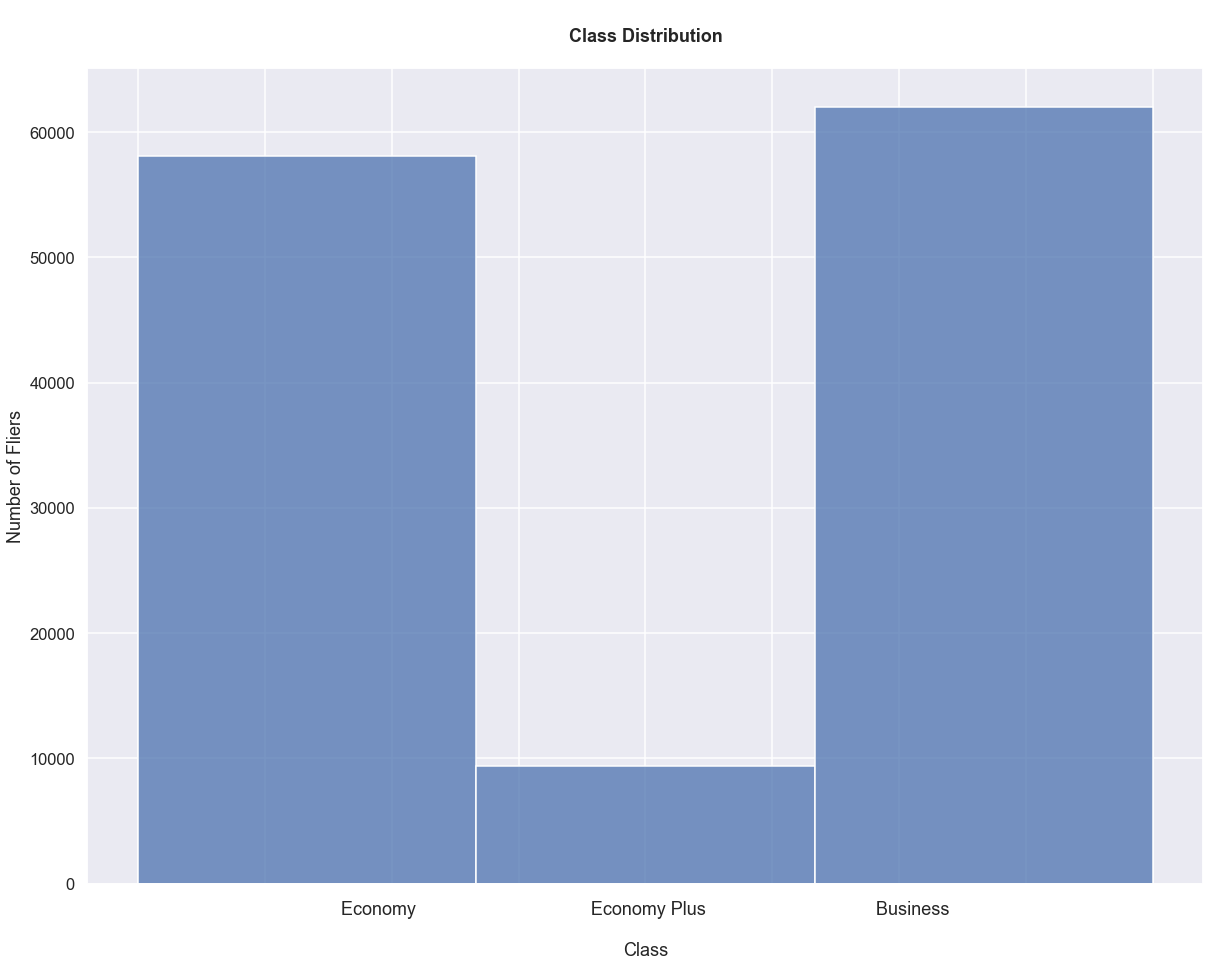

In [150]:
# plot distribution of flight class
# less people in eco plus, more in eco or business

# set size
plt.figure(figsize=(20,15))

# plot
fig = sns.histplot(data = df, x = 'Class', bins = 3)
fig.set(xlabel = 'Economy                                   Economy Plus                                  Business\n\nClass', ylabel = 'Number of Fliers')
fig.set_xticklabels([])

# title the viz
plt.title('\n Class Distribution \n', fontweight = 'bold')

/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be rem

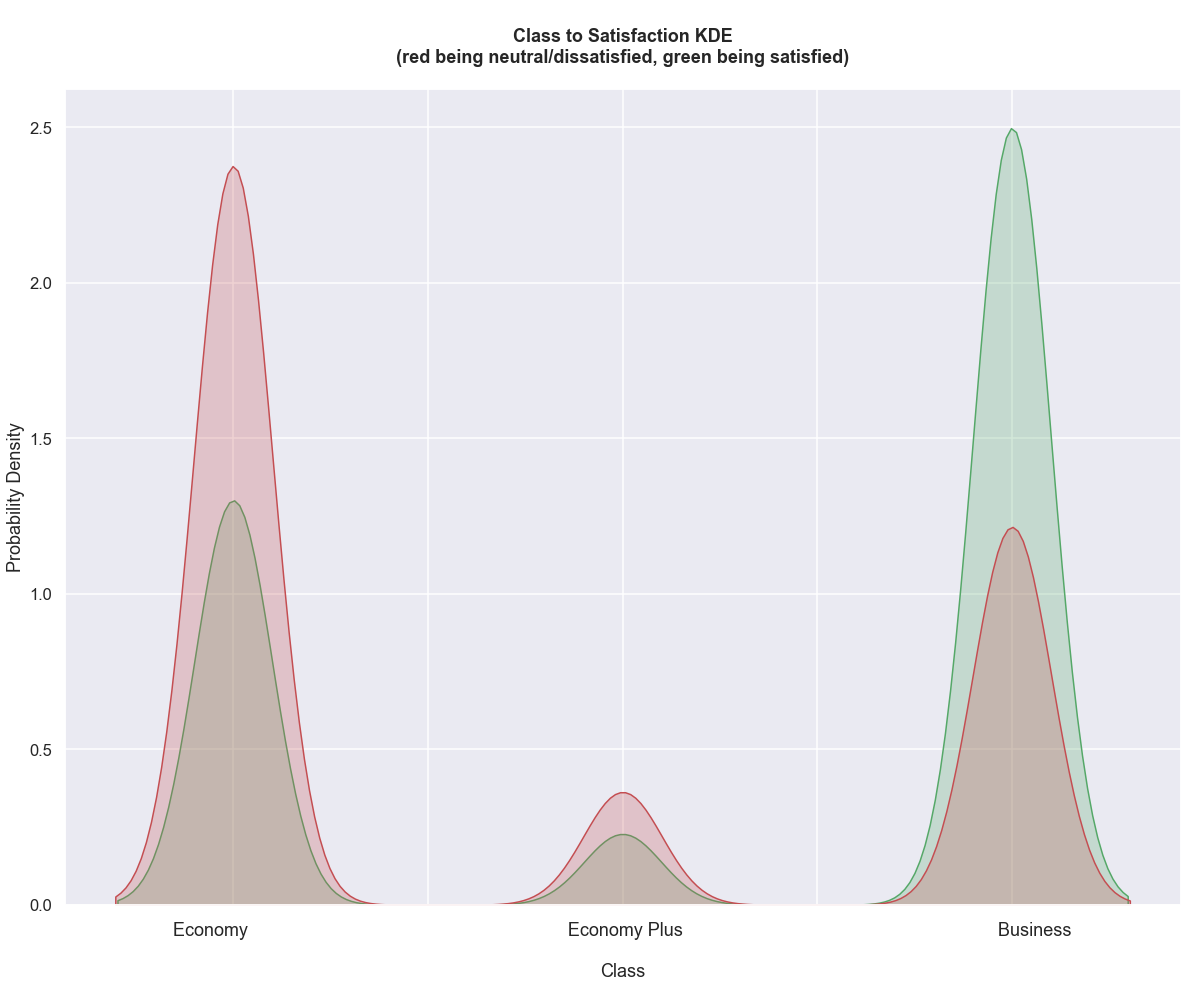

In [151]:
# plot kde of class to satisfaction
# while evidently kdeplot is not the most appropriate methodology for categorical variables
# however, it still accomplishes a set goal of highlighting the difference between satisfaction for economy and business flyers
# the dip in ecoplus can be attributed to the distribution shown above
# it is more probabilistic for a business class customer to be satisfied than a economy class customer

# set size
plt.figure(figsize=(20,15))

# plot 
fig = sns.kdeplot(df.loc[(df['Satisfaction'] == True), 'Class'], color = 'g', shade = True, Label = 'Satisfied')
fig = sns.kdeplot(df.loc[(df['Satisfaction'] == False), 'Class'], color = 'r', shade = True, Label = 'Neutral / Dissatisfied')

# set title, labels
fig.set(xlabel = 'Economy                                                                Economy Plus                                                               Business\n\nClass')
fig.set_xticklabels([])
plt.ylabel('Probability Density')
plt.title('\nClass to Satisfaction KDE\n(red being neutral/dissatisfied, green being satisfied)\n', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, '\n Type of Travel Distribution \n')

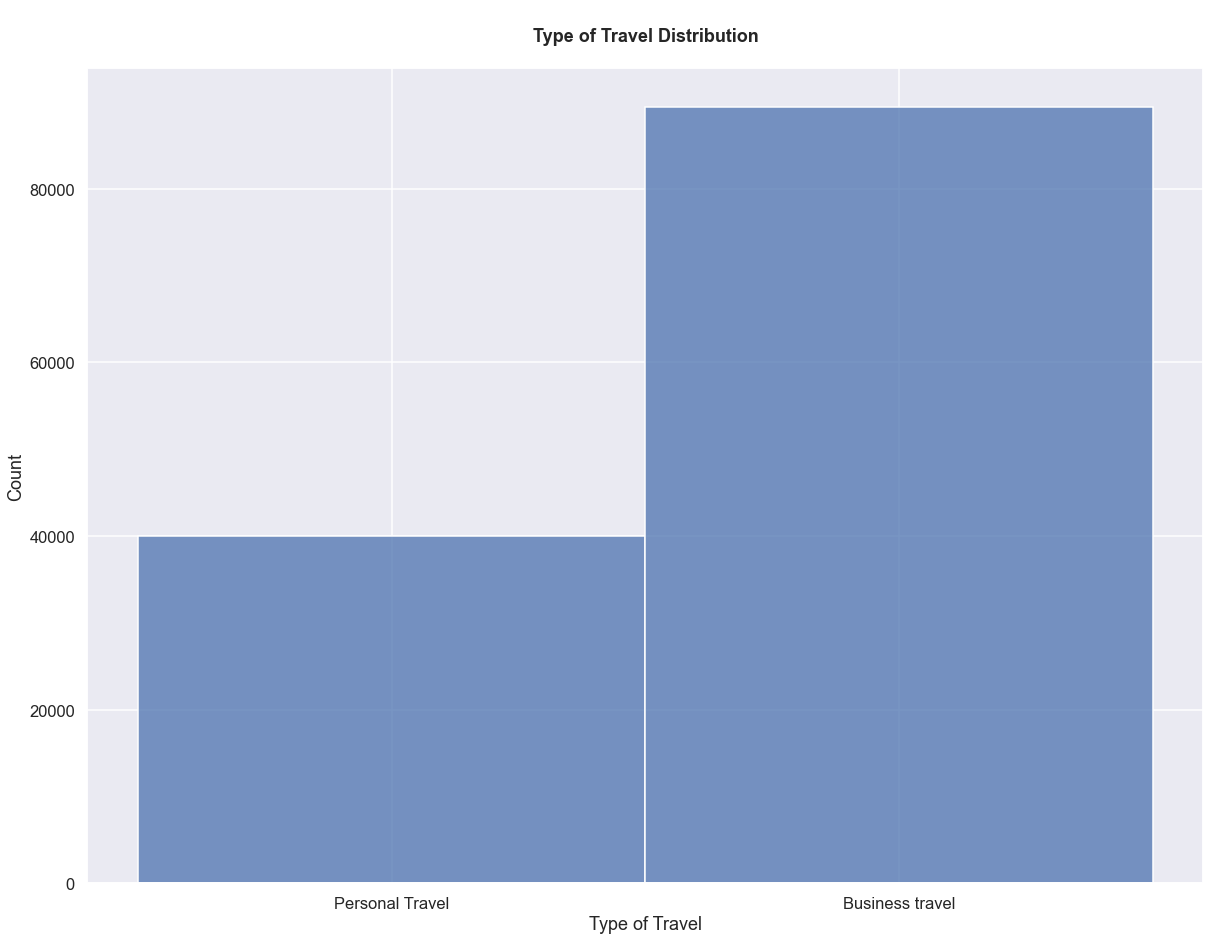

In [152]:
# plot distribution of flight class
# less people in eco plus, more in eco or business

# set size
plt.figure(figsize=(20,15))

# plot
fig = sns.histplot(data = df, x = 'Type of Travel')

# title the viz
plt.title('\n Type of Travel Distribution \n', fontweight = 'bold')

In [153]:
# modify df to make type of travel graphable by casting to int
typeoftravel = {"Personal Travel" : 0, "Business travel" : 1}
df["Type of Travel"] = df["Type of Travel"].map(typeoftravel)

/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
/Users/richardli/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be rem

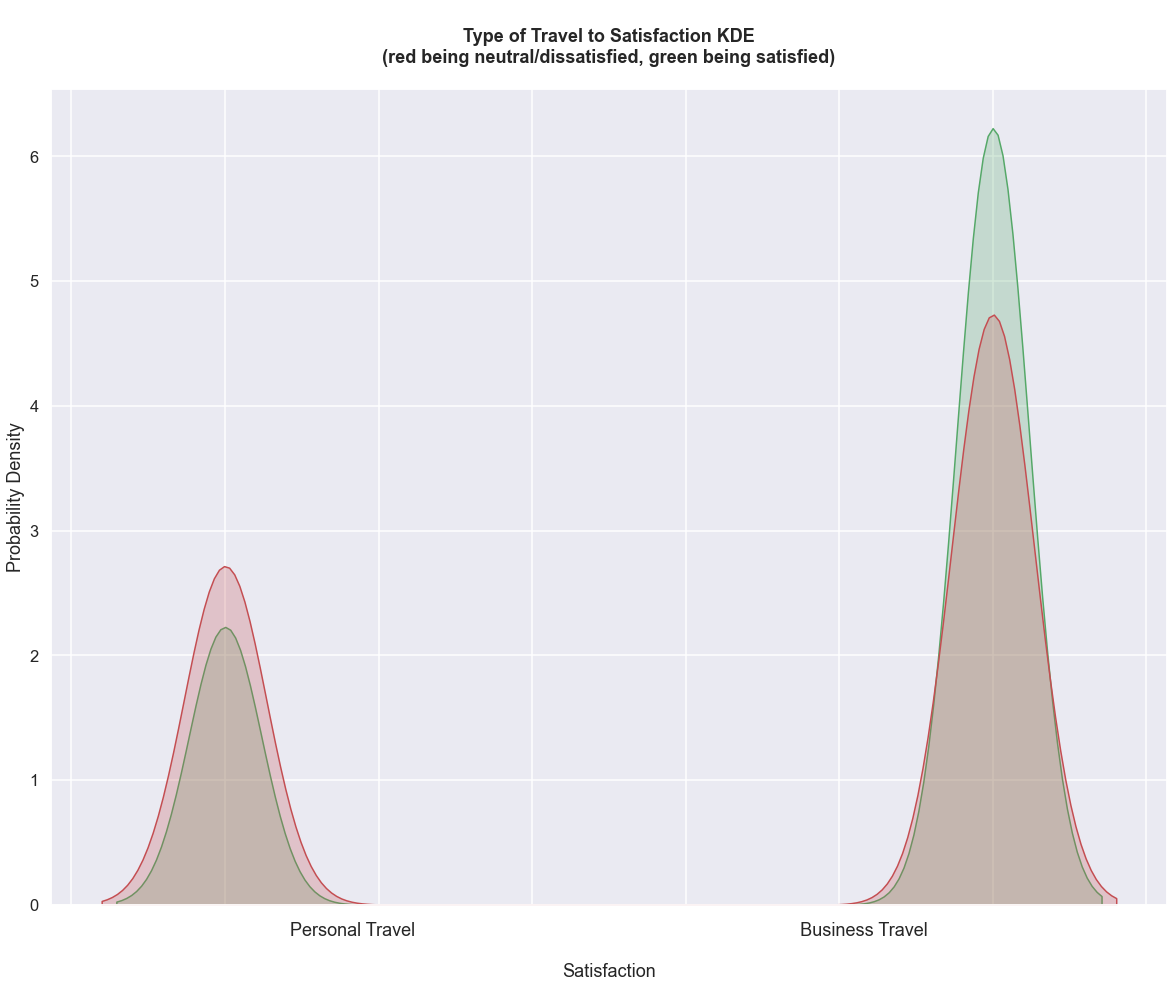

In [159]:
# plot kde of type of travel to satisfaction
# while evidently kdeplot is not the most appropriate methodology for categorical variables
# however, it still accomplishes a set goal of highlighting the difference between satisfaction for casual and business fliers
# though there are less personal fliers than business fliers, personal travelers tend to be less satisfied than business travelers

# set size
plt.figure(figsize=(20,15))

# plot 
fig = sns.kdeplot(df.loc[(df['Satisfaction'] == True), 'Type of Travel'], color = 'g', shade = True, Label = 'Satisfied')
fig = sns.kdeplot(df.loc[(df['Satisfaction'] == False), 'Type of Travel'], color = 'r', shade = True, Label = 'Neutral / Dissatisfied')

# set title, labels
fig.set(xlabel = 'Personal Travel                                                                             Business Travel\n\nSatisfaction', ylabel = 'Number of Fliers')
fig.set_xticklabels([])
plt.ylabel('Probability Density')
plt.title('\nType of Travel to Satisfaction KDE\n(red being neutral/dissatisfied, green being satisfied)\n', fontweight = 'bold')
plt.show()

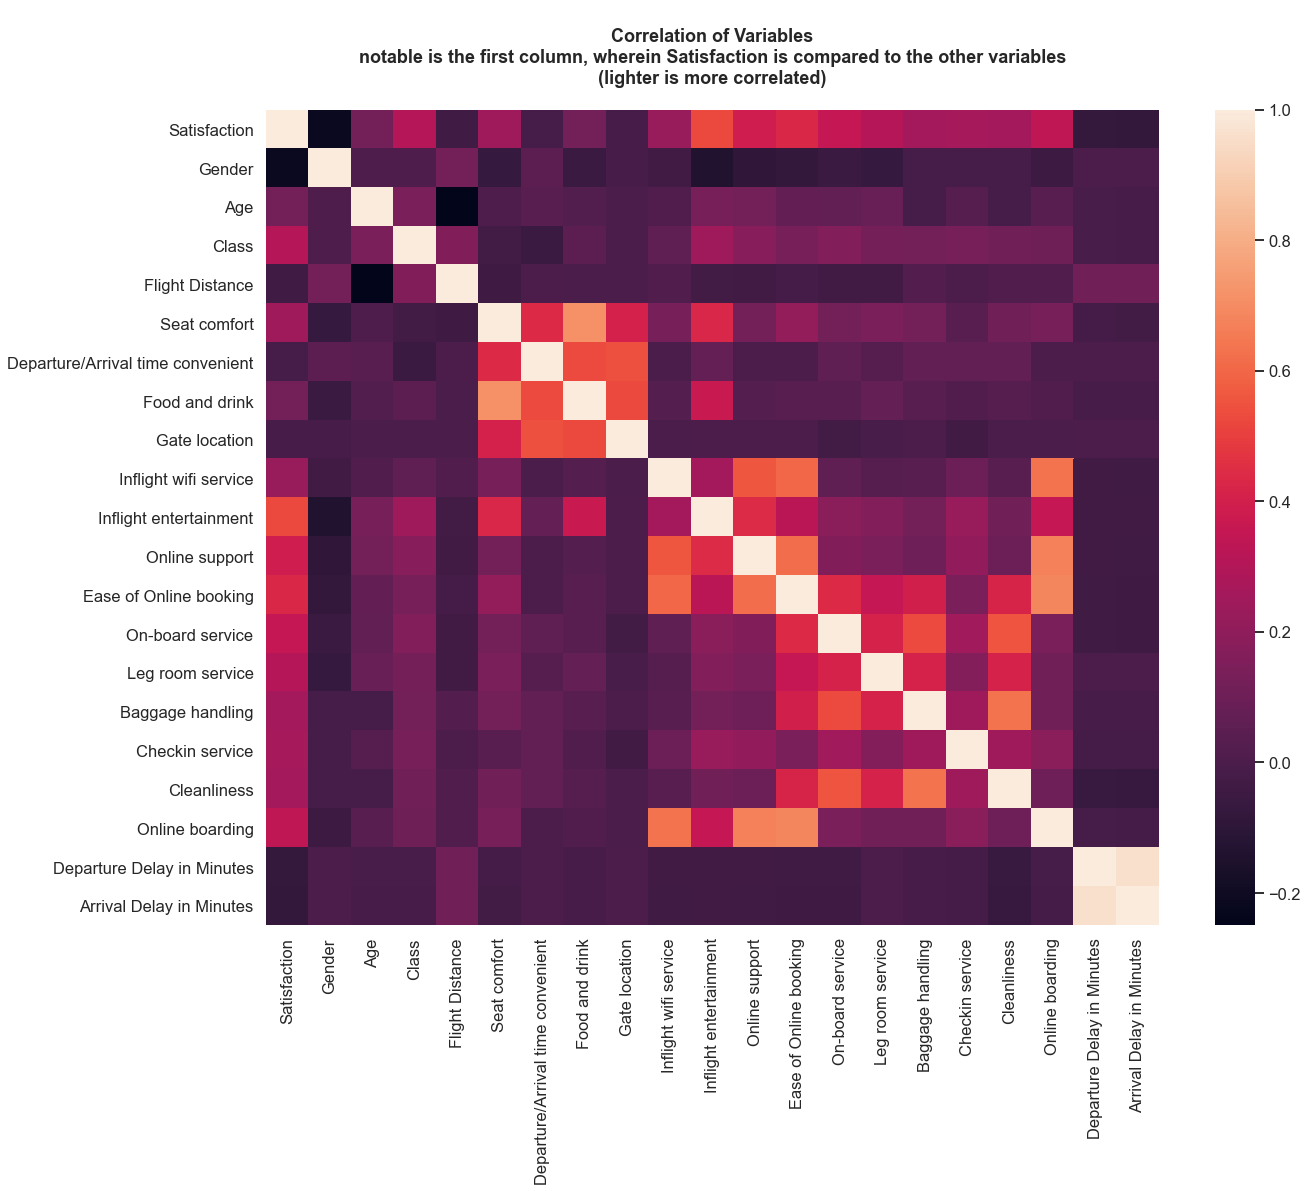

In [160]:
# from this, we can see which variables have a greater correlation to Satisfaction

corr = df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = False)
plt.title('\nCorrelation of Variables\nnotable is the first column, wherein Satisfaction is compared to the other variables\n(lighter is more correlated)\n', fontweight='bold')
plt.show()

## Ethics and Privacy

In large datasets such as this, it is very important to ensure that there is no personally identifiable information included. Within the dataset, there was no information that could lead to the identification of any respondent, given that there was no airport location data, no time/date data, and no names - only the age and gender of the customer. Furthermore, there was no issue of involuntarily obtained information or information presented without the express permission of customers, as this was opt-in information provided voluntarily with the consent of customers. Due to the nature of the data, I believe that there is not a ethical or privacy issue with this project, as the findings only serve to improve customer satisfaction in the future. 

## Conclusion & Discussion

Through this project, the original intent was to predict customer satisfaction given the set of information about a customer - their age, purpose of travel, type of flight, and amenities provided. However, through this project, while I was unable to make such a predictive model, I was able to determine what kind of customer was more likely to be satisfied, and what about a flight was more likely to satisfy a customer. 

The dataset I used had 130K variables, and was collected through surveying airline passengers regarding their experiences, and asking them if they were either satisfied or neutral/dissatisfied. My data preprocessing consisted of casting many string-type variables into boolean or integer for ease in graphing and analysis. I used distribution graphs to visualize and thereby understand the nature of the data and the demographics of the responders, and then kernel density estimate (KDE) to see how these impacted customer satisfaction. Lastly, I used a correlation heatmap to visualize and understand what variables were more likely to be correlated to satisfaction. As a result, I was able to determine that older customers were more likely to be satisfied, business class passengers were more likely to be satisfied, passengers flying for business (rather than leisure) were more like to be satisfied, and flights with more convenience and amenities (ease in online booking, inflight entertainment, online boarding) were more likely to leave a customer satisfied. 

There were many limitations in the project. I had very little data science experience going into the project and that stifled my ability to create the aforementioned predictive model. Within the dataset, I was constrained by the sheer number of variables to keep in mind when determining correlation. Originally, I had chosen to omit many of these variables because I believed them to be the same across different flight classes, but keeping them in indicated that they did, in fact, lead to a correlation between them and satisfaction. Ultimately, I believe that there is social importance to this project, because now it is easier to understand what leads to customer satisfaction onboard flights. Even if little can be done to change customer demographic (i.e. their purpose in flying), changeable aspects of flights such as the convenience and amenities aspect can lead to more satisfaction, and hopefully make all of us happier the next time we fly. 



## Team Contributions

- Richard Li: Data Cleaning, EDA, Final Project
- rest of the group: said they didn't know how to code but helped work on background 